# Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train =pd.read_csv("/home/rathod/Documents/ML/DS/3. Machine Learning/6. General Concepts/data/loan_sanction_train.csv")
test =pd.read_csv("/home/rathod/Documents/ML/DS/3. Machine Learning/6. General Concepts/data/loan_sanction_test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Copy Of Original Dataset

In [5]:
train_copy = train.copy()
test_copy= test.copy()

train_copy.head()
test_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
len(train) #### No of the Rows in train_dataset

614

In [10]:
train.shape#### No of Rows and col in data set

(614, 13)

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

>[value_counts]https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [12]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

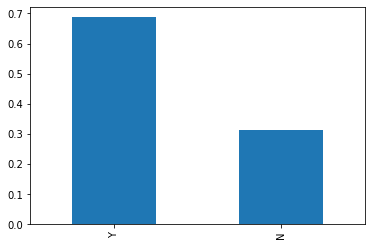

In [13]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

<AxesSubplot:>

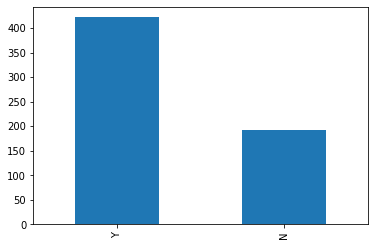

In [14]:
train['Loan_Status'].value_counts(normalize = False).plot.bar()

# Categorical Feature

<AxesSubplot:title={'center':'Loan_Status'}>

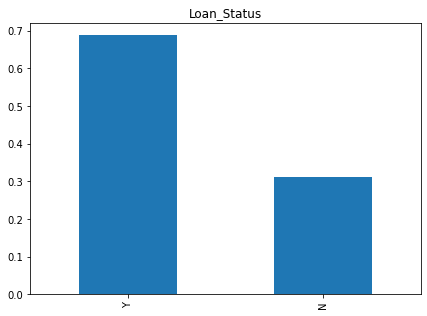

In [15]:
plt.figure()
plt.subplot()
train['Loan_Status'].value_counts(normalize = True).plot.bar(figsize = (7,5),title ='Loan_Status')

<AxesSubplot:title={'center':'Married'}>

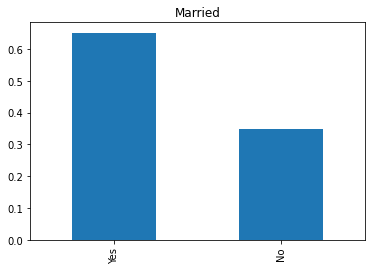

In [16]:
plt.subplot() 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

<AxesSubplot:title={'center':'Self_Employed'}>

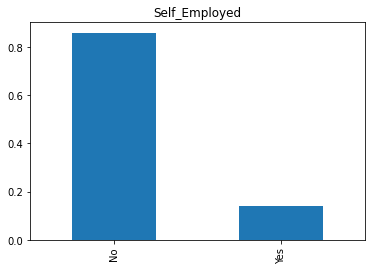

In [17]:
plt.subplot() 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

<AxesSubplot:title={'center':'Credit_History'}>

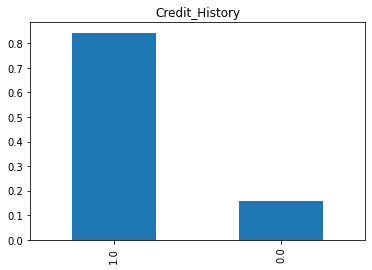

In [18]:
#train['Credit_History'].head()
plt.subplot() 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 


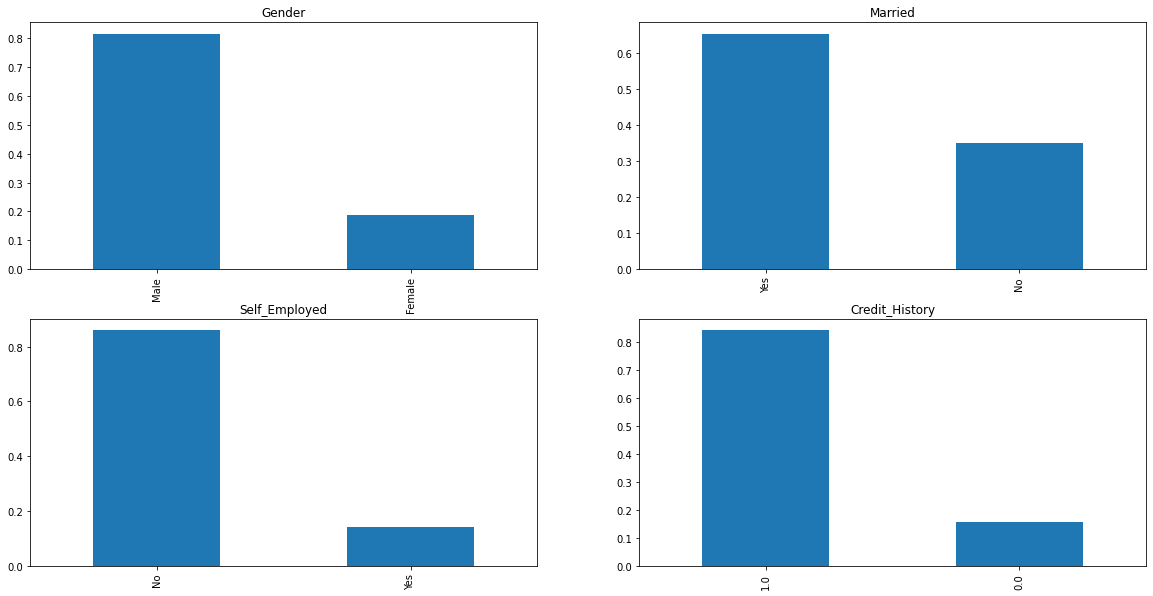

In [19]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

# just practiced

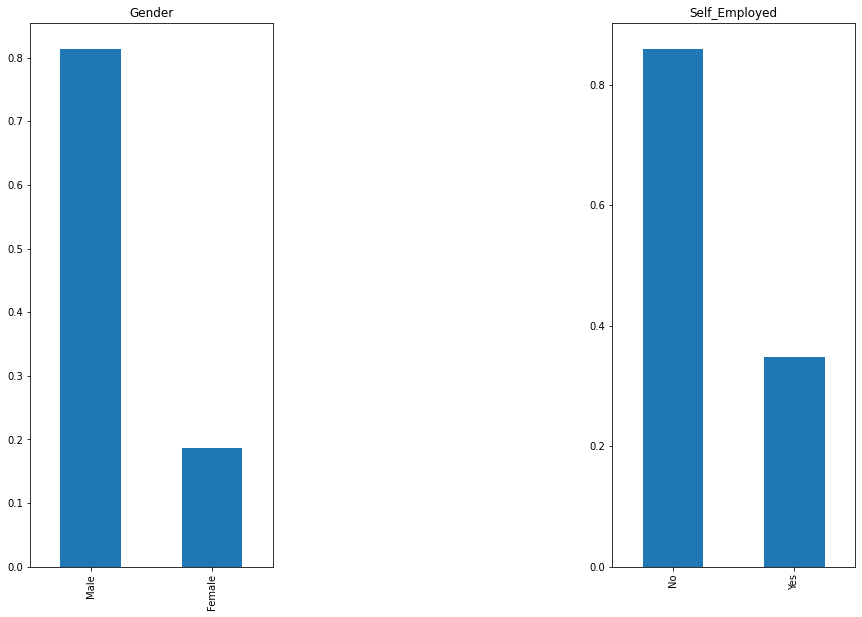

In [20]:
plt.figure(1) ### whole single figure
plt.subplot(141) ## 1 row 4 column position is 1
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(143) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
#plt.subplot(132) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
# plt.subplot(134) 
# train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

<AxesSubplot:title={'center':'Self_Employed'}>

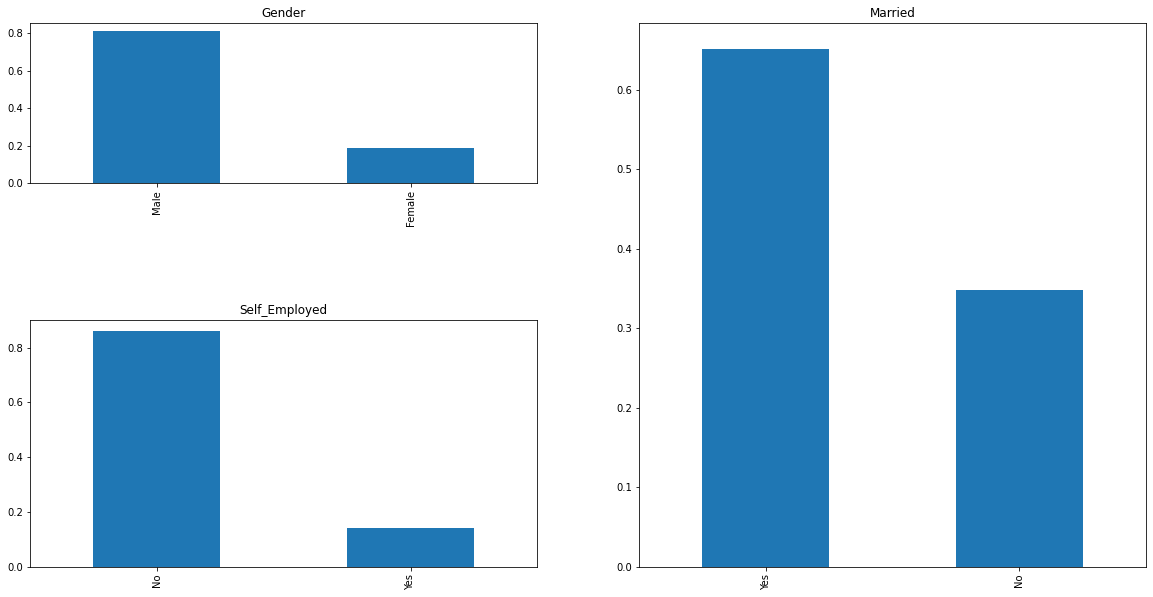

In [21]:
plt.figure(1)
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(122) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
# plt.subplot(134) 
# train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
#plt.show()

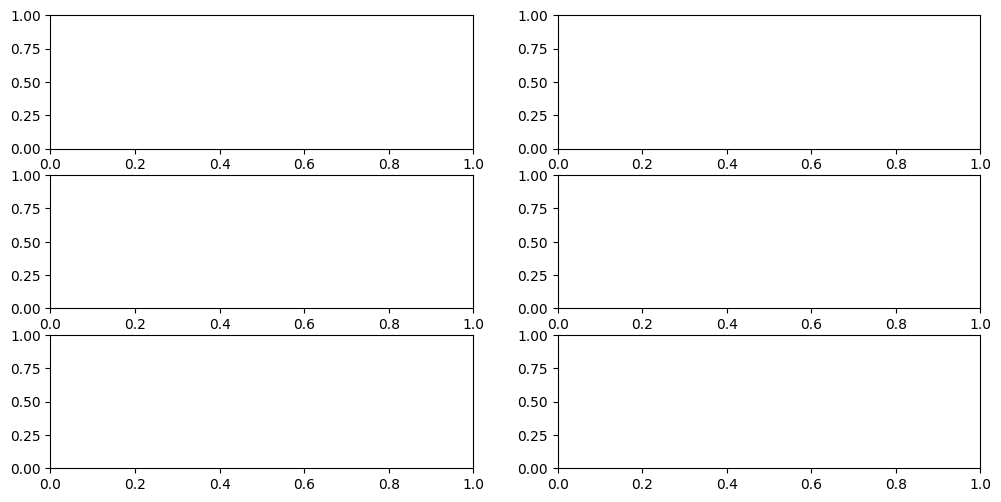

In [22]:
a,b = plt.subplots(3,2,figsize=(12,6),dpi= 100)

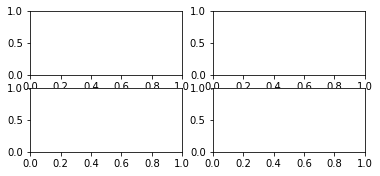

In [23]:
plt.figure(1)
plt.subplot(321)
plt.subplot(322)
plt.subplot(323)
plt.subplot(324)
plt.show()

# rough Work End

<AxesSubplot:>

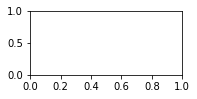

In [24]:
plt.figure(1)
plt.subplot(321)

<AxesSubplot:title={'center':'Dependents'}>

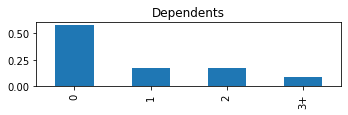

In [25]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')

<AxesSubplot:title={'center':'Dependents'}>

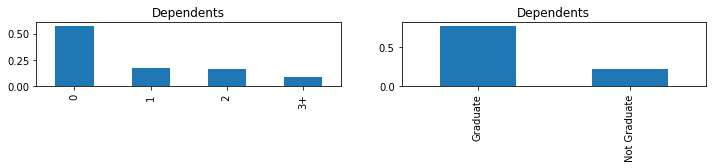

In [26]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,7),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')


<AxesSubplot:>

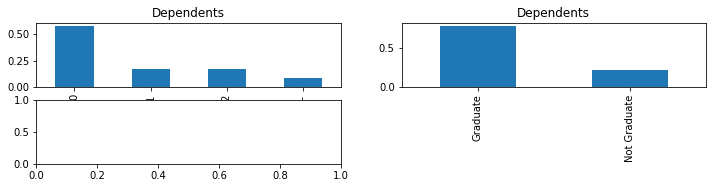

In [27]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(323)

<AxesSubplot:title={'center':'Dependents'}>

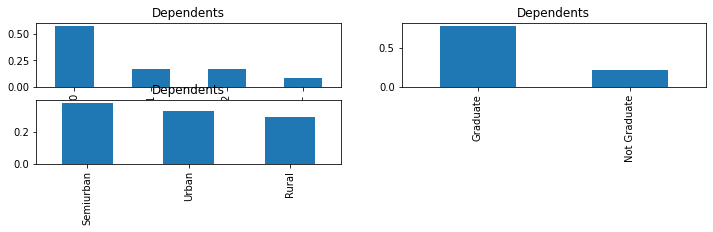

In [28]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(323)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')


Below bar plot are plot 2 and then 1 because i decided 3rows and 2 col so thats why it print like that

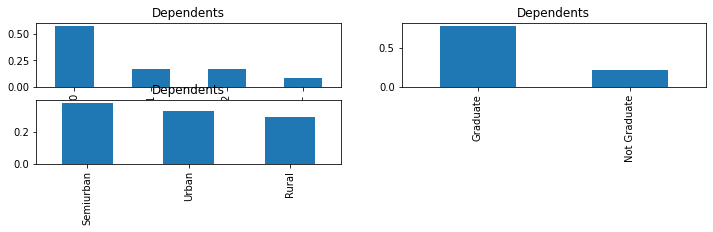

In [29]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(323)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.show()

# BoxPlot
>https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

>https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

>https://www.youtube.com/watch?v=BE8CVGJuftI&feature=youtu.be

>[mathematical of Boxplot]https://www.youtube.com/watch?v=sytBDWefYb0

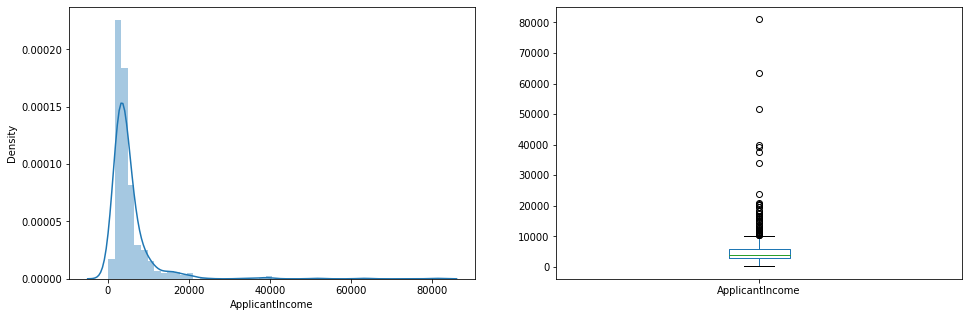

In [30]:
plt.figure(1) 
plt.subplot(121) 
sb.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

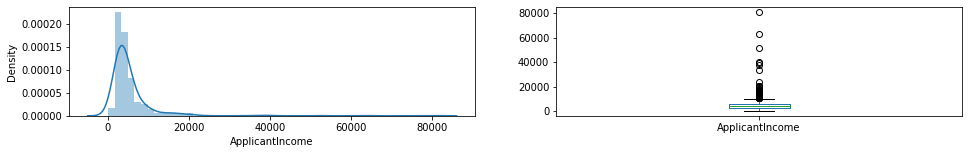

In [31]:
plt.figure(1)
plt.subplot(121) 
sb.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize= (16,2))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

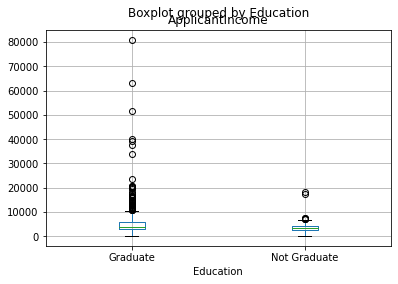

In [32]:
train.boxplot(column = 'ApplicantIncome', by= 'Education' )


Text(0.5, 0.98, '')

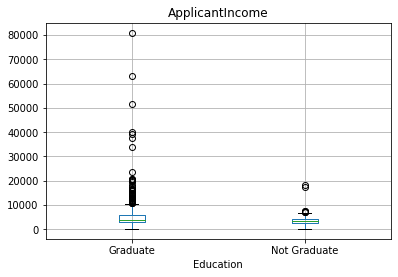

In [33]:
train.boxplot(column = 'ApplicantIncome', by= 'Education' )
plt.suptitle("")

Text(0.5, 0.98, '')

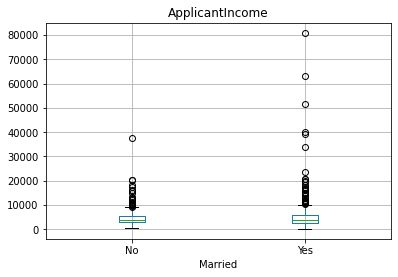

In [34]:
train.boxplot(column = 'ApplicantIncome', by= 'Married' )
plt.suptitle("")

# Categorical Independent Variable vs Target Variable

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [37]:
gender.iloc[:,0:].sum()

Loan_Status
N    187
Y    414
dtype: int64

In [38]:
gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

# Single Feature Ploting

<AxesSubplot:xlabel='Gender'>

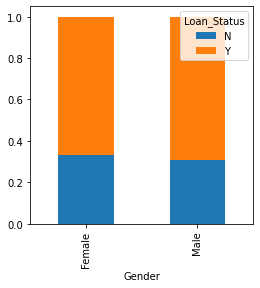

In [39]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
#gender
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Try it  on TITANIC Dataset
>http://my-classes.com/lesson/plotting-and-visualization-in-pandas/

>https://pbpython.com/pandas-crosstab.html

<AxesSubplot:xlabel='Gender'>

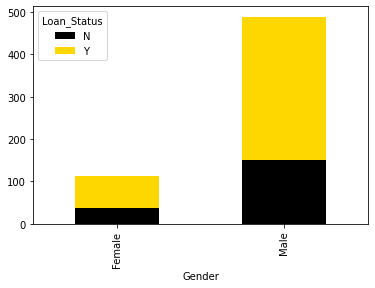

In [40]:
death_counts = pd.crosstab(train['Gender'],train['Loan_Status'])
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

In [41]:
death_counts 
## here i want to check the exact values of 
#black and gold with respect to male and female

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

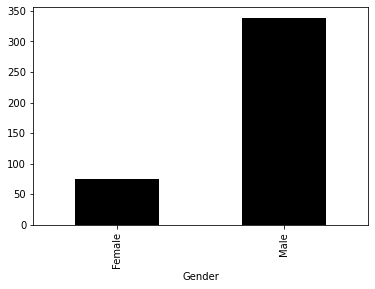

In [42]:
Loan_yes = gender.groupby('Gender').Y.sum().plot(kind='bar',color=['black'])

Loan_yes

<AxesSubplot:xlabel='Gender'>

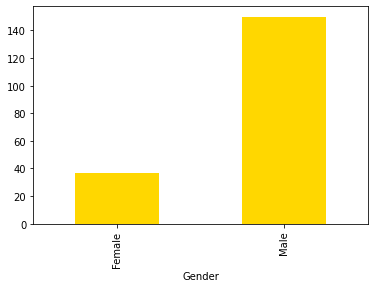

In [43]:
Loan_No = gender.groupby('Gender').N.sum().plot(kind='bar',color=['gold'])
Loan_No

<AxesSubplot:xlabel='Gender'>

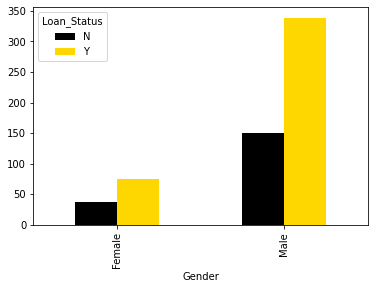

In [44]:
death_counts.iloc[:].plot(kind = 'bar', color= ['black','gold'])
## here i would plot single bar with male and female but 

In [45]:
death_counts.iloc[:]

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:ylabel='Density'>

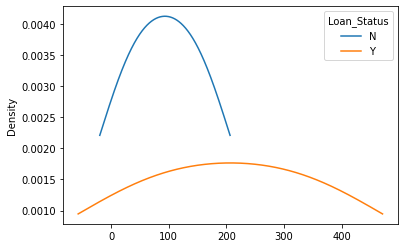

In [46]:
death_counts.iloc[:].plot(kind = 'kde')
# it is not worth to use becuase we didnt understand the what is this  bar plot is good 

# Now Multiple Feature Ploting with Targte Feature
Lets Start

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Here i am not using the ploting tech

<AxesSubplot:xlabel='Gender'>

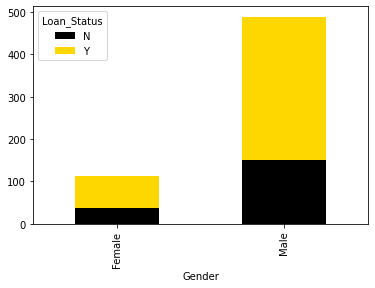

In [48]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
#Gender.div(Gender.sum(1).astype(float),
#           axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Gender.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

here i am checking the use of Stacked and grid


Stacked is basically stack(one above another) and que(line form)

# here Stacked and grid are True

<AxesSubplot:xlabel='Gender'>

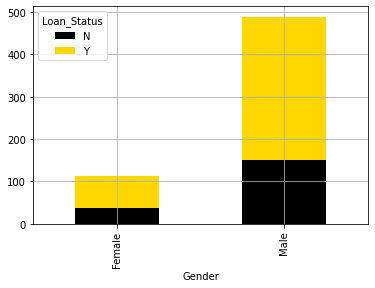

In [49]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
#Gender.div(Gender.sum(1).astype(float),
#           axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Gender.plot(kind='bar', stacked=True, color=['black','gold'], grid=True)
# if i am use Grid is tru then it look like below

# here stacked  nad grid are False

<AxesSubplot:xlabel='Gender'>

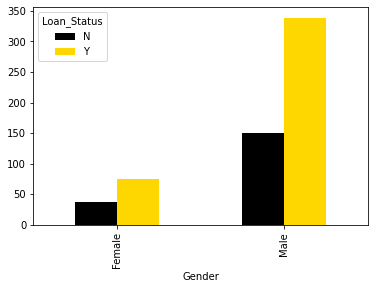

In [50]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
#Gender.div(Gender.sum(1).astype(float),
#           axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Gender.plot(kind='bar', stacked=False, color=['black','gold'], grid=False)
# if i am use Grid is tru then it look like below

# Multiple Feature Ploting with Targte Feature

<AxesSubplot:xlabel='Self_Employed'>

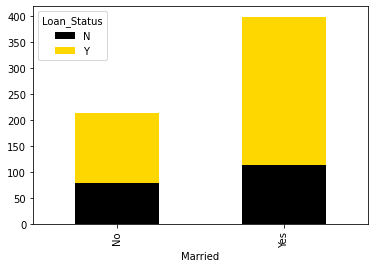

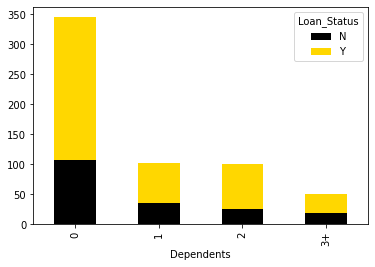

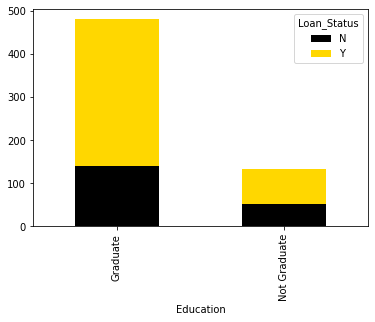

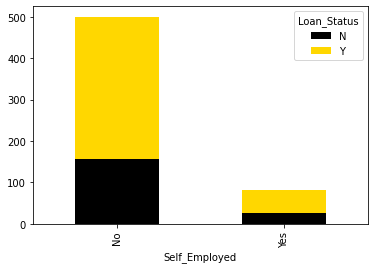

In [51]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Married.plot(kind = 'bar',stacked = True,color = ['black','gold'])
Dependents.plot(kind='bar',stacked = True,color = ['black','gold'])
Education.plot(kind = 'bar',stacked = True,color= ['black','gold'])
Self_Employed.plot(kind = 'bar',stacked =True,color = ['black','gold'])

# Another Categorical freature with Target Feature

In [52]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
# ApplicantIncome = pd.crosstab(train['ApplicantIncome'],train['Loan_Status'])
# ApplicantIncome.head()
# ApplicantIncome.plot(kind = 'bar',stacked = True ,color=['black','gold'] )

I am checking the Credit_History(LABEL) WITH ANOTHER LABEL(Property_Area)

<AxesSubplot:xlabel='Credit_History'>

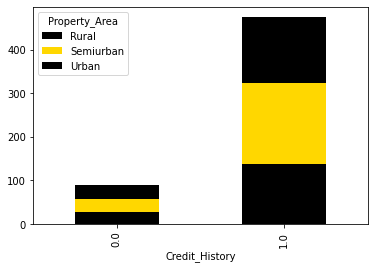

In [54]:
Credit_History = pd.crosstab(train['Credit_History'],train['Property_Area'])
Credit_History.plot(kind = 'bar',stacked = True ,color = ['black','gold'],grid = False)

<AxesSubplot:xlabel='Property_Area'>

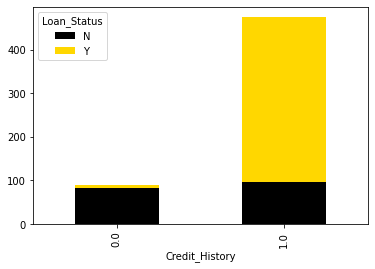

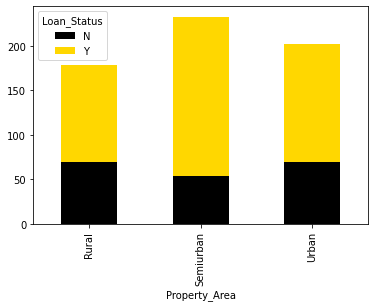

In [55]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.plot(kind = 'bar',stacked = True ,color = ['black','gold'],grid = False)
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.plot(kind = 'bar',stacked = True,color = ['black','gold'])

# Numerical Independent Variable vs Target Variable¶

In [56]:
train.groupby('Loan_Status')['ApplicantIncome'].sum()

Loan_Status
N    1045647
Y    2272077
Name: ApplicantIncome, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome'>

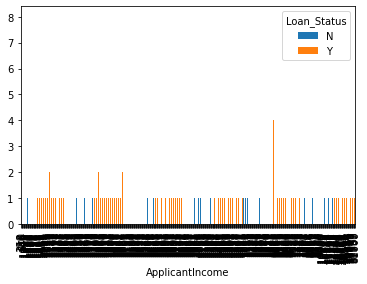

In [57]:
ApplicantIncome = pd.crosstab(train['ApplicantIncome'],train['Loan_Status'])
ApplicantIncome.head()
ApplicantIncome.plot.bar()#(kind = 'bar',stacked = True )

Above graph generated by using  crosstab butthis plot is not understandeble so we need to groupby it for simplicity
used mean()


<AxesSubplot:xlabel='Loan_Status'>

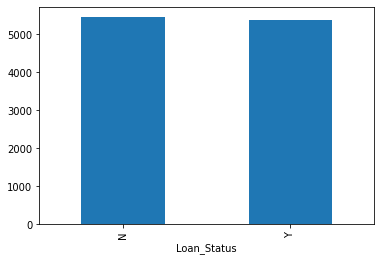

In [58]:
#this is good to undrstand
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

used median() see differ in y scale

<AxesSubplot:xlabel='Loan_Status'>

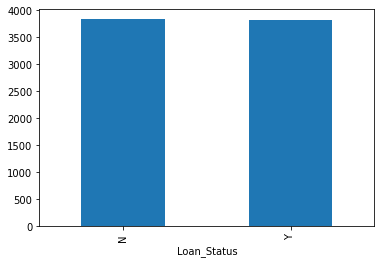

In [59]:
train.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar()

# cut()
Operation is used for convrting Continous generated Data to categorical data


here i converting ApplicantIncome(continoues data) to catogorical data for checking realtion with Loan_status

In [60]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [61]:
train ### i is for checking weather is update or not

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very high
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very high


In [62]:
# bins  = [0,1]
# grp = ['Zero','One']
# train['dependent_bin'] = pd.cut(train['Dependents'],bins,labels = grp)

Text(0, 0.5, 'Loan_Status')

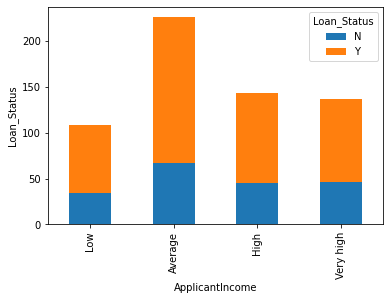

In [63]:
bins=[0,2500,4000,6000,81000]  ##CUT OP CHECK 0-2500,2500-4000 AND SO ON......
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.plot(kind = 'bar',stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel("Loan_Status") ##########comnfused Y LABEL

In [64]:
bins = [0,1000,3000,43000]
grps =['low','Avrage','High']

train['Co_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = grps)
#pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])


In [65]:
train.head() ##here check weather this col is created or not [[[[Co_Income_bin]]]]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Avrage
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Avrage
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


<AxesSubplot:xlabel='CoapplicantIncome'>

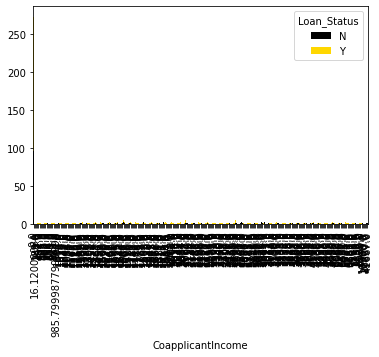

In [66]:
bins = [0,1000,3000,43000]
grps =['low','Avrage','High']
train['Co_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = grps)

Co_Income_bin=pd.crosstab(train['CoapplicantIncome'],train['Loan_Status']) ##mistak is here
Co_Income_bin.plot(kind = 'bar',stacked = True,color = ['black','gold'])

# WHY this plot LOOKed liked
Above plot is looked like this because i put 
CoapplicantIncome insted of created Label (i.e Co_Income_bin)
pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])

<AxesSubplot:xlabel='Co_Income_bin'>

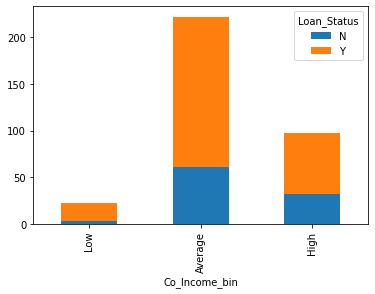

In [67]:
bins=[0,1000,3000,42000]  ##CUT OP CHECK 0-2500,2500-4000 AND SO ON......
grp=['Low','Average','High'] 
train['Co_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=grp)

Income_bin = pd.crosstab(train['Co_Income_bin'],train['Loan_Status'])
Income_bin.plot(kind = 'bar',stacked = True)
# plt.xlabel('ApplicantIncome')
# plt.ylabel("Loan_Status")

# Combinening two feature
#If u have labels which have same entity like (income and Co_income in this data) then u should do this as well

In [68]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0


Text(0, 0.5, 'Counts')

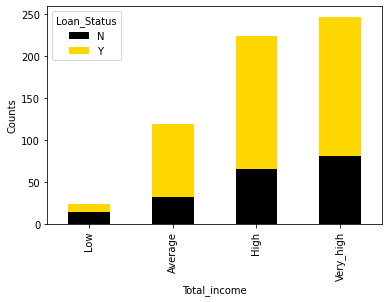

In [69]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000 ,81000]
Label = ['Low','Average','High','Very_high']
train['Total_income'] = pd.cut(train['Total_income'],bins,labels = Label)
Total_income = pd.crosstab(train['Total_income'],train['Loan_Status'])

Total_income.plot(kind = 'bar',stacked = True,color = ['black','gold'],grid = False)
plt.xlabel('Total_income')
plt.ylabel('Counts')

above stmnt, we understand that low total_incone getting less chances Loan_Approve
as compare to other like Average,high,Very_high

<AxesSubplot:xlabel='Loan_Amount_bin'>

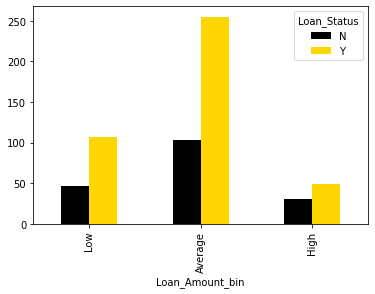

In [70]:
bins = [0,100,200,700]
label_ass =['Low','Average','High'] 
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'],bins,labels = label_ass)
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.plot(kind = 'bar',stacked = False,color = ['black','gold'],grid = False)

 Above Plot  we see the chaances of loan aprove is high when loan_Amount is lesss 

Now i would check the relation ship between these all LAbels that i have created usinbinnn 

In [71]:
train111 = train.copy()
train111

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_income,Loan_Amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,Very_high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,NaN,Average,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,NaN,High,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very high,Low,Very_high,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very high,NaN,Very_high,Average


# Droped Label which are created for more undrstnding

In [72]:
train1 = train.drop(['Income_bin','Co_Income_bin','Total_income','Loan_Amount_bin','Total_income'],axis = 1)

In [73]:
#train1.head() #####Droped all created Labels

# If Feature have Object values then we'll replace its to int for heate map

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    object  
 2   Married            611 non-null    object  
 3   Dependents         599 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      582 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
 13  Income_bin         614 non-null    category
 14  Co_Income_bin      341 non-null    category
 15  Total_income       614 non-null    category
 16  Loan_Amo

In [75]:

# # ctnrl+/  for comment
# ctrl+u =undo selection and ctrl+a select all
# ctrl+home ==go to first cell
# 


In [76]:
train1 = train.drop(['Income_bin','Co_Income_bin','Total_income','Loan_Amount_bin','Total_income'],axis = 1)
train['Dependents'].replace('3+',3,inplace =True)
test['Dependents'].replace('3+',3,inplace = True)
train['Dependents'].replace('N',0,inplace = True)
train['Dependents'].replace('Y',1,inplace =True)


ValueError: 'Acent' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

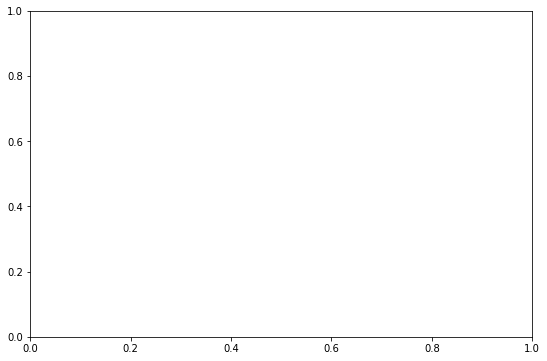

In [77]:
mat= train.corr()
f,ax = plt.subplots(figsize = (9,6))
sb.heatmap(mat,vmax = .8,square =True,cmap = 'Acent')

<AxesSubplot:>

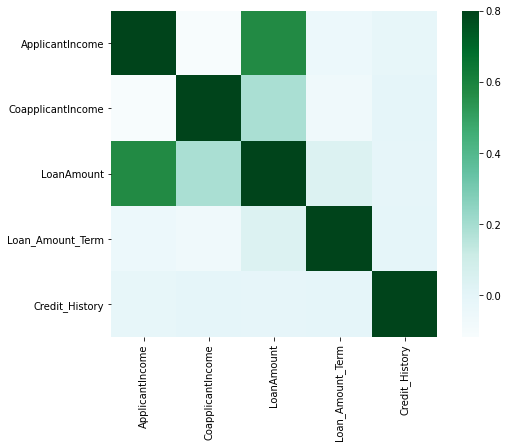

In [78]:
mat= train.corr()
f,ax = plt.subplots(figsize = (9,6))
sb.heatmap(mat,vmax = .8,square =True,cmap = 'BuGn')

In [79]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# missing values

In [80]:
train1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
train1['Gender'].fillna(train1['Gender'].mode()[0], inplace=True)

In [82]:
train1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [83]:
train1['Gender'].mode()[0]    #

'Male'

In [84]:
train1['Gender'].mode()[1]

KeyError: 1

In [86]:
train1['Gender'].fillna(train1['Gender'].mode()[0], inplace=True) 
train1['Married'].fillna(train1['Married'].mode()[0], inplace=True) 
train1['Dependents'].fillna(train1['Dependents'].mode()[0], inplace=True) 
train1['Self_Employed'].fillna(train1['Self_Employed'].mode()[0], inplace=True) 
train1['Credit_History'].fillna(train1['Credit_History'].mode()[0], inplace=True)


In [87]:
train1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [88]:
train1['Loan_Amount_Term'].fillna(train1['Loan_Amount_Term'].mode()[0], inplace=True)

In [89]:
train1['LoanAmount'].fillna(train1['LoanAmount'].median(), inplace=True)

In [90]:
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
test['Gender'].fillna(train1['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train1['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train1['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train1['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train1['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train1['LoanAmount'].median(), inplace=True)

# outlier Treatment

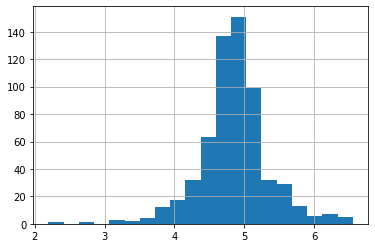

In [92]:
train1['LoanAmount_log'] = np.log(train1['LoanAmount']) 
train1['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Lets Use Algorothms

In [ ]:
train11  = train1.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis =1) #  erroe happened because (Loan_ID ) is not present in test dataset

In [ ]:
print(train1.columns)
print(test.columns) # this is wrote bcz i want to varify the test and train dataset wrt columns

In [ ]:
x= train11.drop('Loan_Status',1)
y = train.Loan_Status
y.head()

In [ ]:
print(train1.head())

print("\n\n**************\n\n")

print(test.head())

In [ ]:
x= train11.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
x.head() #check the Loan_Status is present or not

# here we ll convert the object value into numerical by using one hot encoding

In [ ]:
X=pd.get_dummies(x) 
train=pd.get_dummies(train1) 
test=pd.get_dummies(test)

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
pred = model.predict(x_test,y_test) ## the error is occured bcz predict take one agr but 3were given by me

In [ ]:
pred_x_test = model.predict(x_test)

In [ ]:
model.accuracy_score(y_test,pred_x_test) ###no need to write (model.) at starting

In [ ]:
accuracy_score(y_test,pred_x_test) 

# Let’s make predictions for the test dataset.

In [ ]:
pred_test = model.predict(test)
pred_test

# Cross Validation

https://www.youtube.com/watch?v=fSytzGwwBVw

Let’s import StratifiedKFold from sklearn and fit the model

In [ ]:
from sklearn.model_selection import stratifiedKFold #  S capital

# StratifiedKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i = 1
kf = StratifiedKFold(n_splits =5,random_state = 1,shuffle = True)
for  train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy:',score)
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

In [ ]:
i = 1
kf = StratifiedKFold(n_splits =5,random_state = 1,shuffle = True)
for  train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy:',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

# AUC and ROC Curve

In [ ]:
from sklearn import metrics
fpr,tpr, _ = metrics.roc_curve(yvl,pred)
auc =metrics.roc_curve(yvl,pred)
plt.figure(figsize =(12,8))
plt.plot(fpr,tpr,label = 'Validation,auc ='+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
pred

In [ ]:
yvl.head()

In [ ]:
yvl=pd.get_dummies(yvl) 
yvl.head()

In [ ]:
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [ ]:
train1['Total_Income']=train1['ApplicantIncome']+train1['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [ ]:
sb.distplot(train1['Total_Income']);

Above dist plot is  shifted towards left, i.e., the distribution is right skewed

In [ ]:
train1['Total_Income_log'] = np.log(train1['Total_Income'])
sb.distplot(train1['Total_Income']);
test['Total_Income_log'] = np.log(test['Total_Income'])

this ABOVE plot is happened same as above bcz i am putting the original label i.e Total_Income insted of
Total_Income_log

In [ ]:
train1['Total_Income_log'] = np.log(train1['Total_Income']) 
sb.distplot(train1['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
train1.head()

In [ ]:
train1['EMI']=train1['LoanAmount']/train1['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [ ]:
sb.distplot(train1['EMI'])

In [ ]:
train1['Balance Income']=train1['Total_Income']-(train1['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sb.distplot(train1['Balance Income']);


# we drop those feature which are old

In [ ]:
train1=train1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [ ]:
train1.head()

In [ ]:
train1.columns

In [ ]:
train1.shape

# Let’s prepare the data for feeding into the models.

In [ ]:
x = train1.drop('Loan_Status',1)
Y = train1.Loan_Status

# LogisticRegression

# i = 1
kf = StratifiedKFold(n_splits =5,random_state = 1,shuffle = True)
for  train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy:',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

# Decision TREE

In [ ]:
from sklearn import tree

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)

# hyperparameter 
grid

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
paramgrid

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state = 10,test_size= 0.3)

In [ ]:
grid_search.fit(x_train,y_train)